In [ ]:
# Setting up google drive 
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import models as models
import five_fold_training
import torch
from torch import nn
import torch.utils.data as data_utils
from torch.utils.data import DataLoader, ConcatDataset
from IPython import display
import math
import torchvision
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
  

In [ ]:
train_path = '/content/drive/MyDrive/Data/MM_train_data'
train_data = torch.load(train_path)
test_path = '/content/drive/MyDrive/Data/MM_test_data'
test_data = torch.load(test_path)



In [ ]:
dataset = ConcatDataset([test_data, train_data])

In [ ]:
net1_4 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128, 
      latent_size=4)

In [ ]:
net1_15 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128,  
      latent_size=15)

In [ ]:
net1_25 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128, 
      latent_size=25)

In [ ]:
net1_50 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128, 
      latent_size=50)

In [ ]:
net1_100 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128, 
      latent_size=100)

In [ ]:
net2_4 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128, 
      latent_size=4)

In [ ]:
net2_15 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128,  
      latent_size=15)

In [ ]:
net2_25 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128, 
      latent_size=25)

In [ ]:
net2_50 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128, 
      latent_size=50)

In [ ]:
net2_100 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128, 
      latent_size=100)

In [ ]:
net3_4 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128, 
      latent_size=4)

In [ ]:
net3_15 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128,  
      latent_size=15)

In [ ]:
net3_25 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128, 
      latent_size=25)

In [ ]:
net3_50 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128, 
      latent_size=50)

In [ ]:
net3_100 = models.BernoulliVAE2(input_size=204, 
      hidden_size1=196, 
      hidden_size2=128, 
      latent_size=100)

In [ ]:
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
   if hasattr(layer, 'reset_parameters'):
    print(f'Reset trainable parameters of layer = {layer}')
    layer.reset_parameters()

In [ ]:
def train_VAE_model(net, dataset, k, epochs, batch_size, beta):
  #https://github.com/christianversloot/machine-learning-articles/blob/main/
  #how-to-use-k-fold-cross-validation-with-pytorch.md

  if __name__ == '__main__':
    
    # Configuration options
    k_folds = k
    epochs = epochs
    #loss_function = nn.CrossEntropyLoss()
    loss_function = nn.MSELoss()
    
    # For fold results
    train_results = {}
    val_results = {}
    
    # Set fixed random number seed
    torch.manual_seed(42)
    
    # Prepare dataset by concatenating Train/Test part; we split later.

    dataset = dataset
    
    # Define the K-fold Cross Validator
    kfold = KFold(n_splits=k_folds, shuffle=True)
      
    # Start print
    print('--------------------------------')

    # K-fold Cross Validation model evaluation
    for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
      
      # Print
      print(f'FOLD {fold}')
      print('--------------------------------')
      
      # Sample elements randomly from a given list of ids, no replacement.
      train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
      test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
      
      # Define data loaders for training and testing data in this fold
      trainloader = torch.utils.data.DataLoader(
                        dataset, 
                        batch_size=batch_size, sampler=train_subsampler)
      testloader = torch.utils.data.DataLoader(
                        dataset,
                        batch_size=batch_size, sampler=test_subsampler)
      

      net = net
      net.apply(reset_weights)

      # create an optimizer object
      # Adam optimizer with learning rate 1e-3
      optimizer = torch.optim.Adam(net.parameters(), lr=0.001)



      # Run the training loop for defined number of epochs
      for epoch in range(1, epochs + 1):
          print(f'\n Epoch {epoch}')
          loss = 0
          training_loss = 0
          test_loss = 0
          val_latents = []
          val_outputs = []
          train_outputs = []
          for i, (batch_features) in enumerate(trainloader):
              optimizer.zero_grad()
              # Reshape data so each image is an array with 784 elements
              batch_features = batch_features.view(-1, 204)

              criterion, output, latent = net(batch_features, beta)
              criterion.backward()
              optimizer.step()

              #avg_loss += loss.item()/len(train_data)

              #z, mu_e, logvar_e = net.encode(batch_features)
              #output = net.decode(z)
              
              train_outputs.append(output.detach().numpy())
              
              train_loss = loss_function(output, batch_features)
              
              # Print statistics
              loss += train_loss.item()
              training_loss += train_loss.item()
              
              

              if i % 100 == 0:
                  # Print average loss per sample in batch
                  batch_loss = loss/len(batch_features)
                  print(f'\r[{i:d}/{len(batch_features):d}] batch loss: {batch_loss} ',
                        end='', flush=True)
              loss = 0
            

      # Process is complete.
      print('Training process has finished. Saving trained model.')

      # Print about testing
      #print('Starting testing')

      # Evaluation for this fold

      with torch.no_grad():

        # Iterate over the test data and generate predictions
        for i, (batch_features) in enumerate(testloader):

            # Reshape data so each image is an array with 784 elements
            batch_features = batch_features.view(-1, 204)

            #test_loss = net(batch_features)
            criterion, output, latent = net(batch_features, beta)
            
            val_outputs.append(output.detach().numpy())
            val_latents.append(latent.detach().numpy())
            val_loss = loss_function(output, batch_features)




            test_loss += val_loss.item()


        train_outputs = np.concatenate( train_outputs, axis=0 )
        val_outputs = np.concatenate( val_outputs, axis=0 )
        val_latents = np.concatenate( val_latents, axis=0 )
        model_train_loss = training_loss / len(train_outputs
                          )
        test_loss = test_loss / len(val_outputs
                          )
        #animator.add(epoch, (loss, test_loss))
        #print(train_iter[0][:5])
        #print(outputs[:5])




        # Print fold loss
        print(f'Training loss for fold {fold}: {model_train_loss}')
        print(f'Validation loss for fold {fold}: {test_loss}')
        print('--------------------------------')
        train_results[fold] = model_train_loss
        val_results[fold] = test_loss
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    train_sum = 0.0
    val_sum = 0.0
    for key, value in train_results.items():
      print(f'Training Fold {key} Loss: {value}')
      train_sum += value
    print(f'Trainig Average Loss: {train_sum/len(train_results.items())}')
    train_avg_loss = train_sum/len(train_results.items())
    for key, value in val_results.items():
      print(f'Validation Fold {key} Loss: {value} ')
      val_sum += value
    print(f'Vaidation Average Loss: {val_sum/len(val_results.items())}')
    val_avg_loss = val_sum/len(val_results.items())

    full_outputs = []
    full_outputs.append(train_avg_loss)
    full_outputs.append(val_avg_loss)
    full_outputs.append(val_latents)
    full_outputs.append(val_outputs)
    full_outputs.append(train_outputs)

    

    return full_outputs

        


In [ ]:
batch_size = 128
epochs = 30
k = 5
latent_size = [4, 15, 25, 50,100]


In [ ]:
full_outputs_4_1 = train_VAE_model(net=net1_4,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.2)


--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=4, bias=True)
Reset trainable parameters of layer = Linear(in_features=4, out_features=4, bias=True)
Reset trainable parameters of layer = Linear(in_features=4, out_features=4, bias=True)
Reset trainable parameters of layer = Linear(in_features=4, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.000394474423956126 
 Epoch 2
[200/128] batch loss: 0.0003491778043098748 
 Epoch 3
[200/128] batch loss: 0.0003564002690836787 
 Epoch 4
[200/128] batch loss: 0.0003143769863527

In [ ]:
full_outputs_15_1 = train_VAE_model(net=net1_15,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.2)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=15, bias=True)
Reset trainable parameters of layer = Linear(in_features=15, out_features=15, bias=True)
Reset trainable parameters of layer = Linear(in_features=15, out_features=15, bias=True)
Reset trainable parameters of layer = Linear(in_features=15, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.0003559561155270785 
 Epoch 2
[200/128] batch loss: 0.0003615606692619622 
 Epoch 3
[200/128] batch loss: 0.000321152969263494 
 Epoch 4
[200/128] batch loss: 0.0003245329

In [ ]:
full_outputs_25_1 = train_VAE_model(net=net1_25,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.2)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=25, bias=True)
Reset trainable parameters of layer = Linear(in_features=25, out_features=25, bias=True)
Reset trainable parameters of layer = Linear(in_features=25, out_features=25, bias=True)
Reset trainable parameters of layer = Linear(in_features=25, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.0003574177098926157 
 Epoch 2
[200/128] batch loss: 0.00036951739457435906 
 Epoch 3
[200/128] batch loss: 0.0003575880255084485 
 Epoch 4
[200/128] batch loss: 0.00033624

In [ ]:
full_outputs_50_1 = train_VAE_model(net=net1_50,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.2)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=50, bias=True)
Reset trainable parameters of layer = Linear(in_features=50, out_features=50, bias=True)
Reset trainable parameters of layer = Linear(in_features=50, out_features=50, bias=True)
Reset trainable parameters of layer = Linear(in_features=50, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.00038333082920871675 
 Epoch 2
[200/128] batch loss: 0.0003683881077449769 
 Epoch 3
[200/128] batch loss: 0.00033496966352686286 
 Epoch 4
[200/128] batch loss: 0.0003454

In [ ]:
full_outputs_100_1 = train_VAE_model(net=net1_100,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.2)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=100, bias=True)
Reset trainable parameters of layer = Linear(in_features=100, out_features=100, bias=True)
Reset trainable parameters of layer = Linear(in_features=100, out_features=100, bias=True)
Reset trainable parameters of layer = Linear(in_features=100, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.00037805704050697386 
 Epoch 2
[200/128] batch loss: 0.0003454225661698729 
 Epoch 3
[200/128] batch loss: 0.0003188308619428426 
 Epoch 4
[200/128] batch loss: 0.00

In [ ]:
full_outputs_4_2 = train_VAE_model(net=net2_4,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.5)


--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=4, bias=True)
Reset trainable parameters of layer = Linear(in_features=4, out_features=4, bias=True)
Reset trainable parameters of layer = Linear(in_features=4, out_features=4, bias=True)
Reset trainable parameters of layer = Linear(in_features=4, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.0003925507189705968 
 Epoch 2
[200/128] batch loss: 0.0003442215675022453 
 Epoch 3
[200/128] batch loss: 0.00034432485699653625 
 Epoch 4
[200/128] batch loss: 0.00033511937363

In [ ]:
full_outputs_15_2 = train_VAE_model(net=net2_15,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.5)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=15, bias=True)
Reset trainable parameters of layer = Linear(in_features=15, out_features=15, bias=True)
Reset trainable parameters of layer = Linear(in_features=15, out_features=15, bias=True)
Reset trainable parameters of layer = Linear(in_features=15, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.00034855148987844586 
 Epoch 2
[200/128] batch loss: 0.0003756382211577147 
 Epoch 3
[200/128] batch loss: 0.0003944325726479292 
 Epoch 4
[200/128] batch loss: 0.00036160

In [ ]:
full_outputs_25_2 = train_VAE_model(net=net2_25,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.5)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=25, bias=True)
Reset trainable parameters of layer = Linear(in_features=25, out_features=25, bias=True)
Reset trainable parameters of layer = Linear(in_features=25, out_features=25, bias=True)
Reset trainable parameters of layer = Linear(in_features=25, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.00038885854883119464 
 Epoch 2
[200/128] batch loss: 0.0003421770525164902 
 Epoch 3
[200/128] batch loss: 0.0003799800470005721 
 Epoch 4
[200/128] batch loss: 0.00034777

In [ ]:
full_outputs_50_2 = train_VAE_model(net=net2_50,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.5)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=50, bias=True)
Reset trainable parameters of layer = Linear(in_features=50, out_features=50, bias=True)
Reset trainable parameters of layer = Linear(in_features=50, out_features=50, bias=True)
Reset trainable parameters of layer = Linear(in_features=50, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.00042892646160908043 
 Epoch 2
[200/128] batch loss: 0.00037453864933922887 
 Epoch 3
[200/128] batch loss: 0.0003484966291580349 
 Epoch 4
[200/128] batch loss: 0.0003429

In [ ]:
full_outputs_100_2 = train_VAE_model(net=net2_100,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.5)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=100, bias=True)
Reset trainable parameters of layer = Linear(in_features=100, out_features=100, bias=True)
Reset trainable parameters of layer = Linear(in_features=100, out_features=100, bias=True)
Reset trainable parameters of layer = Linear(in_features=100, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.000373863207641989 
 Epoch 2
[200/128] batch loss: 0.0003755995421670377 
 Epoch 3
[200/128] batch loss: 0.00034580635838210583 
 Epoch 4
[200/128] batch loss: 0.000

In [ ]:
full_outputs_4_3 = train_VAE_model(net=net3_4,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.7)


--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=4, bias=True)
Reset trainable parameters of layer = Linear(in_features=4, out_features=4, bias=True)
Reset trainable parameters of layer = Linear(in_features=4, out_features=4, bias=True)
Reset trainable parameters of layer = Linear(in_features=4, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.0003777122183237225 
 Epoch 2
[200/128] batch loss: 0.00037192305899225175 
 Epoch 3
[200/128] batch loss: 0.00033986964263021946 
 Epoch 4
[200/128] batch loss: 0.0003644306270

In [ ]:
full_outputs_15_3 = train_VAE_model(net=net3_15,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.7)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=15, bias=True)
Reset trainable parameters of layer = Linear(in_features=15, out_features=15, bias=True)
Reset trainable parameters of layer = Linear(in_features=15, out_features=15, bias=True)
Reset trainable parameters of layer = Linear(in_features=15, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.00040442385943606496 
 Epoch 2
[200/128] batch loss: 0.00039641791954636574 
 Epoch 3
[200/128] batch loss: 0.00041654595406726 
 Epoch 4
[200/128] batch loss: 0.000354940

In [ ]:
full_outputs_25_3 = train_VAE_model(net=net3_25,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.7)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=25, bias=True)
Reset trainable parameters of layer = Linear(in_features=25, out_features=25, bias=True)
Reset trainable parameters of layer = Linear(in_features=25, out_features=25, bias=True)
Reset trainable parameters of layer = Linear(in_features=25, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.00039085213211365044 
 Epoch 2
[200/128] batch loss: 0.0003792324278037995 
 Epoch 3
[200/128] batch loss: 0.0003708626900333911 
 Epoch 4
[200/128] batch loss: 0.00036403

In [ ]:
full_outputs_50_3 = train_VAE_model(net=net3_50,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.7)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=50, bias=True)
Reset trainable parameters of layer = Linear(in_features=50, out_features=50, bias=True)
Reset trainable parameters of layer = Linear(in_features=50, out_features=50, bias=True)
Reset trainable parameters of layer = Linear(in_features=50, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.0003718934895005077 
 Epoch 2
[200/128] batch loss: 0.0003857279953081161 
 Epoch 3
[200/128] batch loss: 0.0003666273260023445 
 Epoch 4
[200/128] batch loss: 0.000385994

In [ ]:
full_outputs_100_3 = train_VAE_model(net=net3_100,
                                 dataset=dataset,
                                 k=k, 
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 beta = 0.7)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=204, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=100, bias=True)
Reset trainable parameters of layer = Linear(in_features=100, out_features=100, bias=True)
Reset trainable parameters of layer = Linear(in_features=100, out_features=100, bias=True)
Reset trainable parameters of layer = Linear(in_features=100, out_features=128, bias=True)
Reset trainable parameters of layer = Linear(in_features=128, out_features=196, bias=True)
Reset trainable parameters of layer = Linear(in_features=196, out_features=204, bias=True)

 Epoch 1
[200/128] batch loss: 0.0004068537091370672 
 Epoch 2
[200/128] batch loss: 0.0003909691877197474 
 Epoch 3
[200/128] batch loss: 0.00035331814433448017 
 Epoch 4
[200/128] batch loss: 0.00

In [ ]:
VAE_avg_train_loss_1 = []
VAE_avg_val_loss_1  = []
VAE_trained_models_1 = [full_outputs_4_1 ,
                  full_outputs_15_1 ,
                  full_outputs_25_1 ,
                  full_outputs_50_1,
                  full_outputs_100_1 ]


In [ ]:
VAE_avg_train_loss_2 = []
VAE_avg_val_loss_2  = []
VAE_trained_models_2 = [full_outputs_4_2 ,
                  full_outputs_15_2 ,
                  full_outputs_25_2 ,
                  full_outputs_50_2,
                  full_outputs_100_2 ]

In [ ]:
VAE_avg_train_loss_3 = []
VAE_avg_val_loss_3  = []
VAE_trained_models_3 = [full_outputs_4_3 ,
                  full_outputs_15_3 ,
                  full_outputs_25_3 ,
                  full_outputs_50_3,
                  full_outputs_100_3 ]

In [ ]:


'''# Open a file and use dump()
with open('VAE_trained_models_1.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(VAE_trained_models_1, file)'''

"# Open a file and use dump()\nwith open('VAE_trained_models_1.pkl', 'wb') as file:\n      \n    # A new file will be created\n    pickle.dump(VAE_trained_models_1, file)"

In [ ]:
'''# Open a file and use dump()
with open('VAE_trained_models_2.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(VAE_trained_models_2, file)'''

"# Open a file and use dump()\nwith open('VAE_trained_models_2.pkl', 'wb') as file:\n      \n    # A new file will be created\n    pickle.dump(VAE_trained_models_2, file)"

In [ ]:
'''# Open a file and use dump()
with open('VAE_trained_models_3.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(VAE_trained_models_3, file)'''

"# Open a file and use dump()\nwith open('VAE_trained_models_3.pkl', 'wb') as file:\n      \n    # A new file will be created\n    pickle.dump(VAE_trained_models_3, file)"

In [ ]:
# Open the file in binary mode
with open('VAE_trained_models_1.pkl', 'rb') as file:
      
    # Call load method to deserialze
    VAE_trained_models_1 = pickle.load(file)
  
    print(VAE_trained_models_1)

FileNotFoundError: ignored

In [ ]:
# Open the file in binary mode
with open('VAE_trained_models_2.pkl', 'rb') as file:
      
    # Call load method to deserialze
    VAE_trained_models_2 = pickle.load(file)
  
    print(VAE_trained_models_2)

In [ ]:
# Open the file in binary mode
with open('VAE_trained_models_3.pkl', 'rb') as file:
      
    # Call load method to deserialze
    VAE_trained_models_3 = pickle.load(file)
  
    print(VAE_trained_models_3)

In [ ]:
for model in VAE_trained_models_1:
  VAE_avg_train_loss_1.append(model[0])
  VAE_avg_val_loss_1.append(model[1])

In [ ]:
for model in VAE_trained_models_2:
  VAE_avg_train_loss_2.append(model[0])
  VAE_avg_val_loss_2.append(model[1])

In [ ]:
for model in VAE_trained_models_3:
  VAE_avg_train_loss_3.append(model[0])
  VAE_avg_val_loss_3.append(model[1])

In [ ]:
df = pd.DataFrame(data=[latent_size, VAE_avg_train_loss_1, VAE_avg_val_loss_1, VAE_avg_train_loss_2, VAE_avg_val_loss_2, VAE_avg_train_loss_3, VAE_avg_val_loss_3])

df.columns = df.iloc[0]
df = df[1:]

df['Loss'] = ['Average training loss .2', 'Average validation loss .2', 'Average training loss .5', 'Average validation loss .5', 'Average training loss .7', 'Average validation loss .7']
df = df.set_index('Loss')
df

,4.0,15.0,25.0,50.0,100.0
Loss,,,,,
Average training loss .2,0.000315,0.000255,0.000236,0.000232,0.000232
Average validation loss .2,0.000321,0.000261,0.000243,0.000238,0.000239
Average training loss .5,0.000332,0.000289,0.000281,0.000280,0.000283
Average validation loss .5,0.000337,0.000295,0.000285,0.000285,0.000289
Average training loss .7,0.000337,0.000303,0.000301,0.000301,0.000304
Average validation loss .7,0.000342,0.000307,0.000305,0.000306,0.000309


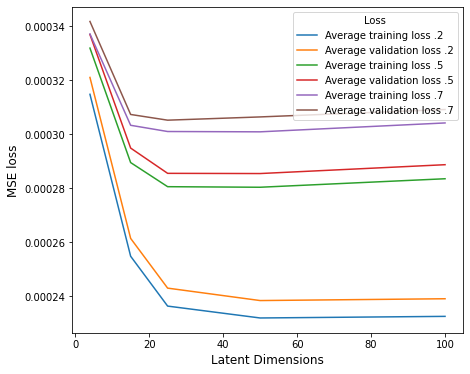

In [ ]:

# transpose and plot
ax = df.T.plot(figsize=(7, 6))
ax.set_ylabel('MSE loss', fontsize=12)
ax.set_xlabel('Latent Dimensions', fontsize=12)
plt.show()

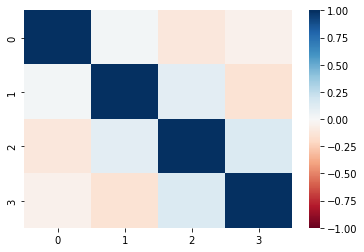

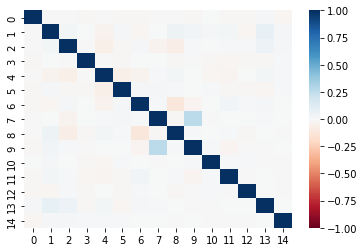

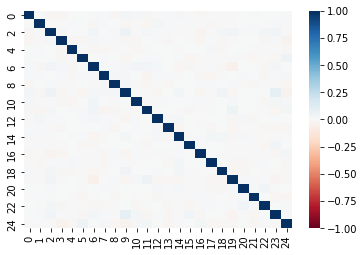

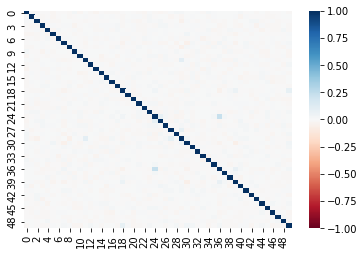

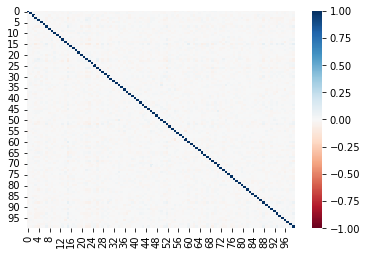

In [ ]:
for model in VAE_trained_models_1:
  val_latents_df = pd.DataFrame(model[2])
  plt.figure()
  sb.heatmap(val_latents_df.corr(), cmap="RdBu", vmin=-1, vmax=1)


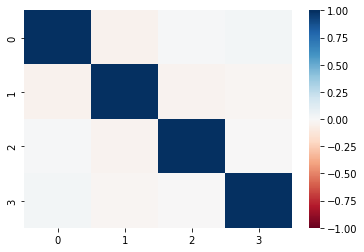

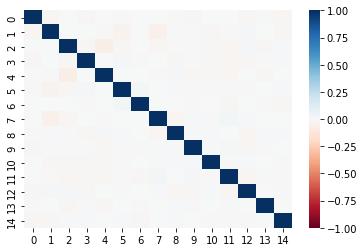

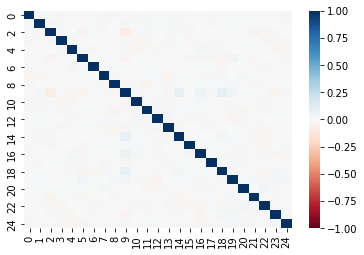

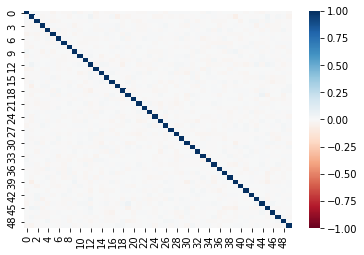

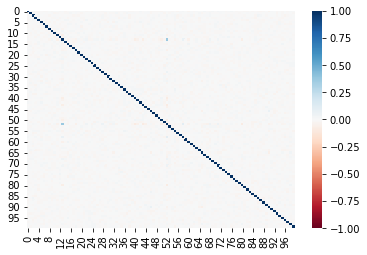

In [ ]:
for model in VAE_trained_models_2:
  val_latents_df = pd.DataFrame(model[2])
  plt.figure()
  sb.heatmap(val_latents_df.corr(), cmap="RdBu", vmin=-1, vmax=1)

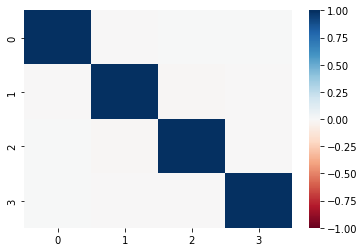

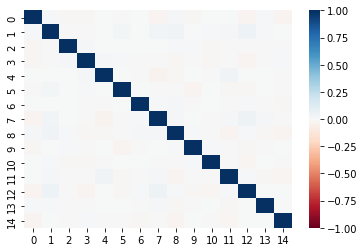

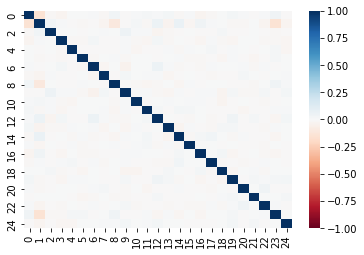

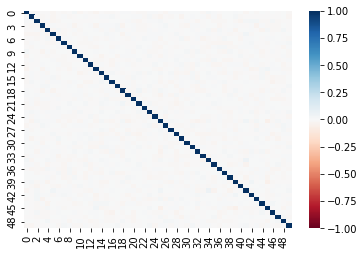

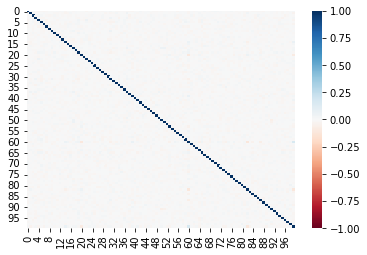

In [ ]:
for model in VAE_trained_models_3:
  val_latents_df = pd.DataFrame(model[2])
  plt.figure()
  sb.heatmap(val_latents_df.corr(), cmap="RdBu", vmin=-1, vmax=1)